In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("sentiment.csv")

In [6]:
df

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,729,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,730,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,731,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


1. the sentiment feature and text, trim white spaces and convert to lowercase.

In [9]:
import pandas as pd

df = pd.read_csv("sentiment.csv")

df['Sentiment'] = df['Sentiment'].str.strip().str.lower()
df['Text'] = df['Text'].str.strip().str.lower()

print(df[['Sentiment', 'Text']].head())


  Sentiment                                         Text
0  positive        enjoying a beautiful day at the park!
1  negative           traffic was terrible this morning.
2  positive          just finished an amazing workout! 💪
3  positive  excited about the upcoming weekend getaway!
4   neutral  trying out a new recipe for dinner tonight.


2. What are the sentiment categories? Tabulate and visualize the number of texts for each
category

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_23382/2031754179.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='viridis')


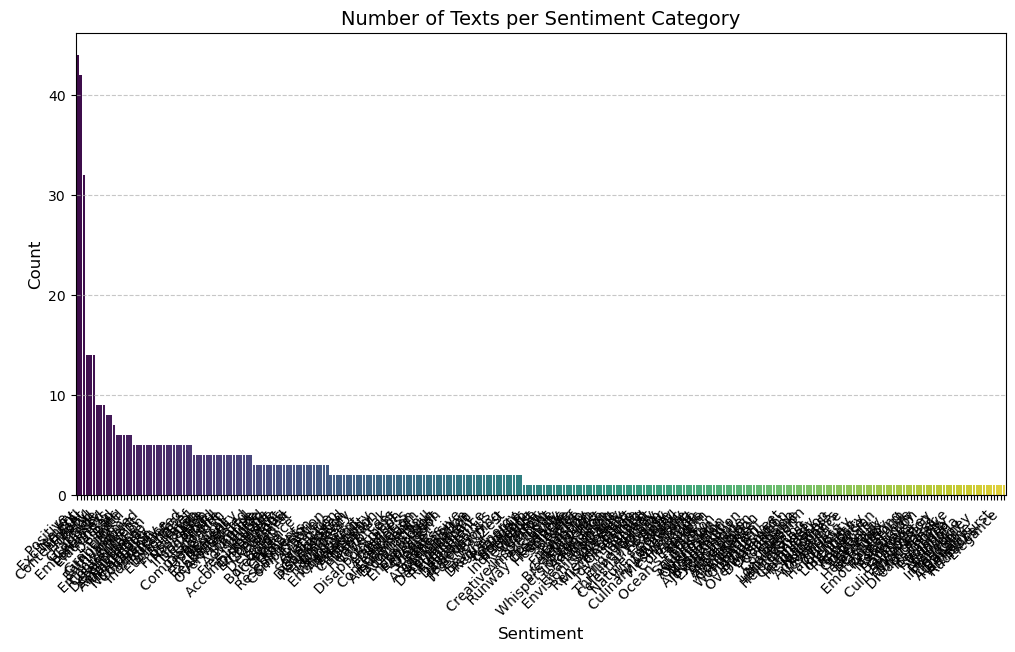

In [14]:

import seaborn as sns


sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='viridis')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of Texts per Sentiment Category", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


                  count        mean        std    min    25%    50%    75%  \
Sentiment                                                                    
Acceptance          3.0   57.000000   0.000000   57.0   57.0   57.0   57.0   
Acceptance          5.0   88.200000   7.918333   83.0   83.0   86.0   87.0   
Accomplishment      3.0   83.666667  18.036999   65.0   75.0   85.0   93.0   
Admiration          1.0  134.000000        NaN  134.0  134.0  134.0  134.0   
Admiration          2.0   58.000000   1.414214   57.0   57.5   58.0   58.5   
...                 ...         ...        ...    ...    ...    ...    ...   
Wonder              1.0   71.000000        NaN   71.0   71.0   71.0   71.0   
Wonder              1.0   68.000000        NaN   68.0   68.0   68.0   68.0   
Wonderment          1.0   65.000000        NaN   65.0   65.0   65.0   65.0   
Yearning            2.0  119.000000   0.000000  119.0  119.0  119.0  119.0   
Zest                2.0  109.000000   9.899495  102.0  105.5  10

/var/folders/r0/kmkzmgh52q9f32w030w6nl_h0000gn/T/ipykernel_23382/4034969935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Text_Length', palette='viridis')


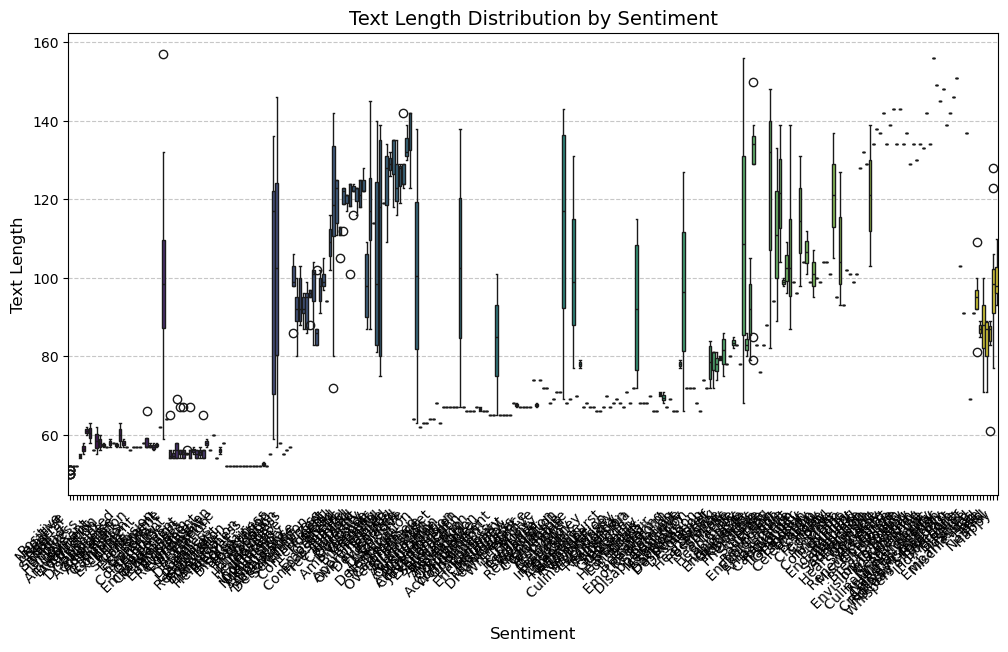

In [16]:
# 3. Tabulate and Visualize the text length for each sentiment category
df['Text_Length'] = df['Text'].str.len()
length_stats = df.groupby('Sentiment')['Text_Length'].describe()

print(length_stats)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sentiment', y='Text_Length', palette='viridis')
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Text Length", fontsize=12)
plt.title("Text Length Distribution by Sentiment", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# 4. Find and display the text(s) with the maximum number of likes
max_likes = df[df['Likes'] == df['Likes'].max()]
print(max_likes[['Text', 'Likes']])










                                                  Text  Likes
335  Thrilled to witness the grandeur of a cultural...     80
345  Motivated to achieve fitness goals after an in...     80
355  Anticipation for an upcoming adventure in an e...     80
368  Elation over discovering a rare book in a quai...     80
382  A sense of wonder at the vastness of the cosmo...     80
402  Awe-inspired by the vastness of the cosmos on ...     80
432  Heartache deepens, a solitary journey through ...     80
470  Dancing on sunshine, each step a celebration o...     80
481  Surrounded by the colors of joy, a canvas pain...     80
510  At the front row of Adele's concert, each note...     80
520  At a Justin Bieber concert, the infectious bea...     80
530  Captivated by the spellbinding plot twists, th...     80
540  Celebrating a historic victory in the World Cu...     80
550  After a series of defeats, the soccer team fac...     80
560  In the serene beauty of a sunset, nature unfol...     80
570  Und

In [22]:
# 5. Find and display the text(s) with the maximum reposts and its sentiment
max_reposts = df[df['Retweets'] == df['Retweets'].max()]
print(max_reposts[['Text', 'Retweets', 'Sentiment']])


                                                  Text  Retweets  \
335  Thrilled to witness the grandeur of a cultural...        40   
345  Motivated to achieve fitness goals after an in...        40   
355  Anticipation for an upcoming adventure in an e...        40   
368  Elation over discovering a rare book in a quai...        40   
382  A sense of wonder at the vastness of the cosmo...        40   
402  Awe-inspired by the vastness of the cosmos on ...        40   
432  Heartache deepens, a solitary journey through ...        40   
470  Dancing on sunshine, each step a celebration o...        40   
481  Surrounded by the colors of joy, a canvas pain...        40   
510  At the front row of Adele's concert, each note...        40   
520  At a Justin Bieber concert, the infectious bea...        40   
530  Captivated by the spellbinding plot twists, th...        40   
540  Celebrating a historic victory in the World Cu...        40   
550  After a series of defeats, the soccer team 

Empty DataFrame
Columns: [Country, Count]
Index: []


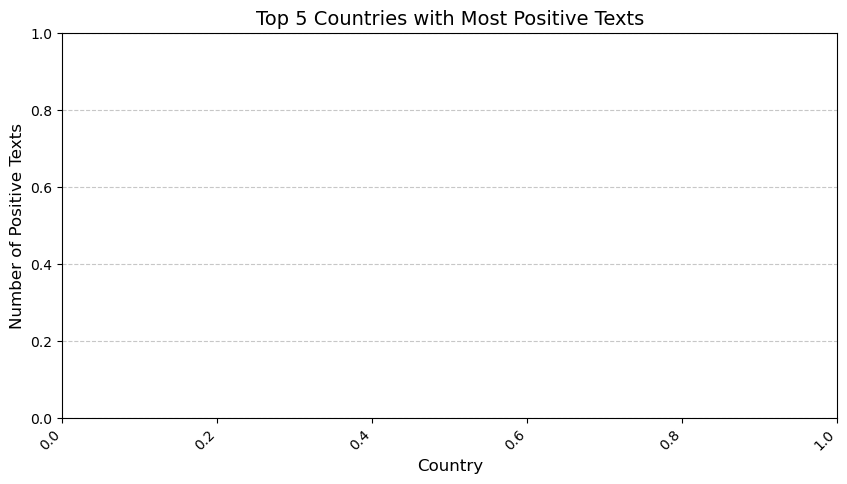

In [52]:
# 6. Tabulate and Visualize the top 5 countries that have posted the most texts with a positive sentiment
pos_counts = df[df['Sentiment'].str.lower() == 'positive'].groupby('Country').size().reset_index(name='Count')
top5_countries = pos_counts.nlargest(5, 'Count')

print(top5_countries)

plt.figure(figsize=(10, 5))
sns.barplot(data=top5_countries, x='Country', y='Count', palette='viridis')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Positive Texts", fontsize=12)
plt.title("Top 5 Countries with Most Positive Texts", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
# 7. Find and display all the text(s) with the word ‘Travel’ in their hashtag
travel_texts = df[df['Hashtags'].str.contains('Travel', case=False, na=False)]
print(travel_texts[['Text', 'Hashtags']])



Empty DataFrame
Columns: [Text, Hashtags]
Index: []


In [50]:
# 8. Find and display the most popular (most number of likes) posts (top 5) from 2020 which were of a negative sentiment
neg_2020 = df[(df['Year'] == 2020) & (df['Sentiment'].str.lower() == 'negative')]
top5_neg_2020 = neg_2020.nlargest(5, 'Likes')

print(top5_neg_2020[['Text', 'Likes']])

Empty DataFrame
Columns: [Text, Likes]
Index: []


In [32]:
# 9. Find and display Users and their posts with 'Happiness' sentiment
happy_posts = df[df['Sentiment'].str.lower() == 'happiness'][['User', 'Text']]
print(happy_posts)

Empty DataFrame
Columns: [User, Text]
Index: []


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Year is numeric and drop NaNs
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Country', 'Sentiment'])

# Standardize sentiment column
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

# Filter only required sentiments
df = df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])]

# Group by Year and Sentiment
yearly_counts = df.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Check if DataFrame contains numeric values
print(yearly_counts.dtypes)

# If all columns are numeric, proceed with plotting
if not yearly_counts.empty:
    plt.figure(figsize=(12, 6))
    yearly_counts.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.8)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Tweets", fontsize=12)
    plt.title("Sentiment Distribution Over the Years", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Sentiment")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No valid numeric data to plot.")


Series([], dtype: object)
No valid numeric data to plot.


In [40]:
print(yearly_counts.dtypes)
print(yearly_counts.head())


Series([], dtype: object)
Empty DataFrame
Columns: []
Index: []
